# Generación de un modelo para clasificar los dígitos MNIST
---
### Montar la carpeta de Google Drive y definir constantes para trabajar

In [1]:
def entorno_de_trabajo():
    if 'google.colab' in str(get_ipython()): return "colab"  # Colab?
    else: return "local"  # Local => Linux, Windows, WSL

if entorno_de_trabajo() == 'colab': # maquina virtual colab
    from google.colab import drive
    drive.mount('/content/drive/')  # monta G-drive en entorno COLAB

    FUENTES_DIR = '/content/drive/MyDrive/Colab Notebooks/FUENTES/'  # carpeta donde se encuentran archivos .py auxiliares
    DATOS_DIR = '/content/drive/MyDrive/Colab Notebooks/DATOS/'      # carpeta donde se encuentran los datasets
else: # entorno local # Rutas relativas al script para entornos locales Windows, WSL y Linux
    FUENTES_DIR = '../../FUENTES/'  # Ajusta según tu estructura
    DATOS_DIR = '../../DATOS/'

import sys
sys.path.append(FUENTES_DIR) # agrega ruta de busqueda donde tenemos archivos .py

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


---
### Preparación de Dataset

In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Input, LeakyReLU
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers
from tensorflow.keras import callbacks
import tensorflow as tf
from sklearn import metrics
import seaborn as sns

import  matplotlib.pyplot as plt
import numpy as np

# %% Carga y perparación de datos de entrenamiento y testeo

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

Y_train= to_categorical(np.array(Y_train))
Y_test = to_categorical(np.array(Y_test))

# dimension de las imagenes sacadas del primer ejmeplo
IMG_SHAPE = X_train[0].shape # (28,28)
TARGET_CNT= len(Y_train[0])  # 10 dígitos/clases

# normalización
X_train = X_train / 255
X_test  = X_test  / 255

 ### Muestra ejemplos del dataset

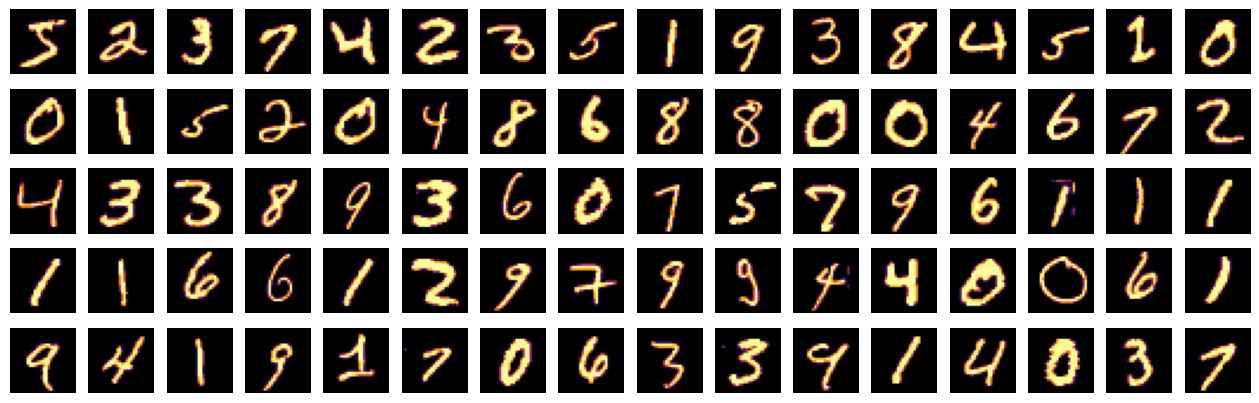

In [3]:
# Crear una figura para mostrar las imágenes en una matriz de FILAS x COLS
COLOR_MAP = 'inferno'  #@param ['viridis', 'plasma', 'inferno', 'magma', 'cividis', 'gray']
FILAS = 5          #@param {type:"slider", min:3, max:6, step:2}
COLS = 16               #@param {type:"slider", min:10, max:20, step:2}
fig, axes = plt.subplots(FILAS, COLS, figsize=(COLS, FILAS))

# Iterar sobre cada imagen a visualizar
for i in range(COLS):
    for j in range(FILAS):
        # Seleccionar la imagen correspondiente
        img = X_train[i * FILAS + j]
        # Mostrar la imagen en la posición correspondiente de la matriz
        axes[j, i].imshow(img, cmap=COLOR_MAP)
        axes[j, i].axis('off')  # Ocultar los ejes

### Generación del Modelo

In [ ]:
# %% Construccion del modelo
PADDING='same'
ACTIV='relu'

model = Sequential()

model.add(Input(shape=(*IMG_SHAPE, 1)))
model.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), activation=ACTIV, padding=PADDING ))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size=(3,3), strides=(1,1), activation=ACTIV, padding=PADDING ))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, kernel_size=(3,3), strides=(1,1), activation=ACTIV, padding=PADDING ))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64, activation=ACTIV))
model.add(Dense(TARGET_CNT, activation='softmax'))

optimizer = optimizers.Adam(learning_rate=0.0001)
#optimizer = optimizers.RMSprop(learning_rate=0.0001)
#optimizer = optimizers.SGD(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'] )

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,114 (652.79 KB)

 Trainable params: 167,114 (652.79 KB)

 Non-trainable params: 0 (0.00 B)

### Entrenamiento del Modelo

Entrena el modelo utilizando parada temprana:
* Monitorea la función de pérdida para los datos de validación (**val_loss**)
* Aborta el entrenamiento si la función de pérdida no mejora **patience** veces.
* Cuando finaliza el entrenamiento restaura los pesos del mejor valor obtenido por la función de pérdida (**restore_best_weights**).



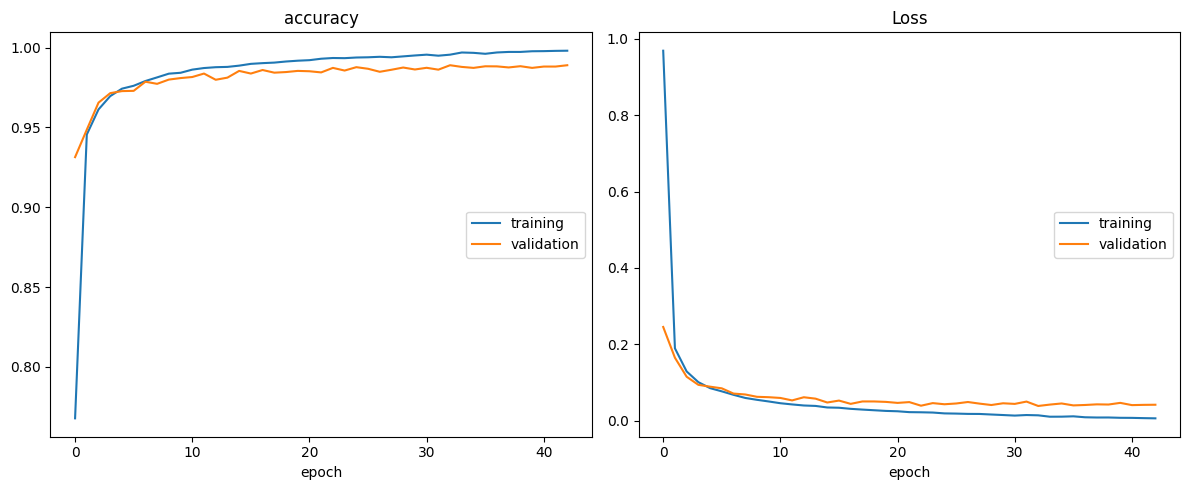

In [6]:
!pip install livelossplot --quiet
# paqueta para graficar en vivo las metricas durante el entrenamiento
from livelossplot import PlotLossesKeras
from livelossplot.outputs import MatplotlibPlot

LOTES  = 128
EPOCAS = 100
PACIENCIA = 10

# parada temprana para evitar el sobreajuste
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=PACIENCIA, restore_best_weights=True )
visual_plot = PlotLossesKeras( outputs=[ MatplotlibPlot(figsize=(12, 5)) ] )

# %% Entrenamiento del modelo usando datos de entrenamiento y validacion
H = model.fit(x=X_train, y=Y_train, batch_size=LOTES,
              epochs=EPOCAS,
              validation_split=0.3,
              callbacks=[early_stop, visual_plot],
              verbose=0
              )


### Graficos del entrenamiento. Evaluación del modelo

In [7]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns

# Crear subplots interactivos
fig = make_subplots(rows=1, cols=3,
                    subplot_titles=('Pérdida', 'Accuracy', 'Matriz de Confusión'),
                    )

# Gráfico de pérdida
fig.add_trace( go.Scatter(y=H.history["loss"], name="train_loss", mode='lines'),   row=1, col=1 )
fig.add_trace( go.Scatter(y=H.history["val_loss"], name="val_loss", mode='lines'), row=1, col=1 )

# Gráfico de accuracy
fig.add_trace( go.Scatter(y=H.history["accuracy"], name="train_acc", mode='lines'),   row=1, col=2)
fig.add_trace( go.Scatter(y=H.history["val_accuracy"], name="val_acc", mode='lines'), row=1, col=2)

# Matriz de confusión
pred = model.predict(X_train, verbose=0)
cm = metrics.confusion_matrix(np.argmax(Y_train, axis=1), np.argmax(pred, axis=1))

# Matriz de confusión con Plotly
confusion_heatmap = go.Heatmap(
    z=cm,
    x=[f'Pred {i}' for i in range(cm.shape[1])],
    y=[f'Real {i}' for i in range(cm.shape[0])],
    colorscale='Viridis',
    text=cm,
    texttemplate='%{text}',
    textfont={'size':10},
)

# Agregar la matriz de confusión
fig.add_trace(confusion_heatmap, row=1, col=3)

fig.update_layout(
    height=450,
    width=1200,
    title={
        'text': "Métricas de Entrenamiento",
        'font': dict(size=20),
        'y':0.95,
        'x':0.5,
        'xanchor': 'center'},
    legend=dict(
        orientation="v",
        yanchor="bottom",
        y=0.1,
        xanchor="center",
        x=0.57
    ),
    margin=dict(t=100, b=50, l=50, r=50)
)

fig.show()

# Resto del código para imprimir métricas
print("\nEfectividad del modelo con datos de entrenamiento: %6.2f%%" % (H.history['accuracy'][-1]*100))
print("Efectividad del modelo con datos de validación...: %6.2f%%" % (H.history['val_accuracy'][-1]*100))

# Evalua el modelo con datos de prueba
pred = model.evaluate(X_test, Y_test, verbose=0)
print("Efectividad del modelo con datos de Prueba.......: %6.2f%%\n" % (pred[1]*100))
pred = model.predict(X_test, verbose=0)
print(metrics.classification_report(np.argmax(Y_test, axis=1), np.argmax(pred, axis=1)))


Efectividad del modelo con datos de entrenamiento:  99.81%
Efectividad del modelo con datos de validación...:  98.90%
Efectividad del modelo con datos de Prueba.......:  99.01%

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.98      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



### Salva modelo entrenado para recuperarlo luego

In [8]:
model.save(DATOS_DIR+'MNIST_conv_model.keras')

### Recupera modelo guardado


In [4]:
from tensorflow.keras.models import load_model

model = load_model(DATOS_DIR+'MNIST_conv_model.keras')

### Abre panel de dibujo y realiza prediccion

In [6]:
import numpy as np
from imagen import DrawPanel
from PIL import Image, ImageOps

IMG_SHAPE=(28,28)

dp = DrawPanel()
image = dp.draw(size=IMG_SHAPE, line_width=2.0, scale = 10)

# obtiene canal de dibujo y normaliza a [0, 1]
gs_image = np.array(image)[:,:,3]/255

# prepara formato para funcion de prediccion
gs_image = gs_image.reshape(1,*IMG_SHAPE,1)

# obtiene salida (sofmax)
resp = model.predict(gs_image, verbose=0)

# posición de la neurona de salida con mayor valor
digito = np.argmax(resp)

print("\033[1mEl trazo dibujado corresponde al dígito %d\033[0m" % digito)


El trazo dibujado corresponde al dígito 2
